In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

url = 'https://gamblingindustrynews.com/usa-gambling-statistics/'

response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse the HTML content 
soup = BeautifulSoup(response.content, 'html.parser')
divs = soup.find_all('div', class_='table_container')
second_table_container = divs[1]
table = second_table_container.find('table')
headers = [header.text.strip() for header in table.find_all('th')]

rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if cells:
        rows.append([cell.text.strip() for cell in cells])

df = pd.DataFrame(rows, columns=headers)

# Data cleaning
def convert_to_numeric(value):
    try:
        value = value.replace('$', '').replace(',', '')
        if value.endswith('B'):
            return float(value[:-1]) * 1000
        elif value.endswith('M'):
            return float(value[:-1]) 
        return float(value)
    except ValueError:
        print(f"Unable to convert value: {value}")
        return None

df['Commercial Gaming Revenue 2023'] = df['Commercial Gaming Revenue 2023'].apply(convert_to_numeric)
df = df.dropna(subset=['Commercial Gaming Revenue 2023'])

df['Annual Change %'] = df['Annual Change %'].str.rstrip('%').astype(float) 

print(df)

# Write to CSV using csv module
with open('table.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(df.columns)  # write header
    for index, row in df.iterrows():
        writer.writerow(row)

print("CSV file has been written successfully.")

Unable to convert value: –
              State  Commercial Gaming Revenue 2023  Annual Change %
0            Nevada                         15500.0              4.6
1      Pennsylvania                          5800.0              9.8
2        New Jersey                          5800.0             10.9
3          New York                          4700.0             11.6
4          Michigan                          3500.0              9.9
5           Indiana                          2800.0             -2.3
6         Louisiana                          2700.0              3.8
7       Mississippi                          2500.0             -3.5
8              Ohio                          3300.0             42.3
9          Maryland                          2500.0             13.5
10         Illinois                          2500.0             17.8
11             Iowa                          1900.0              0.8
12         Missouri                          1900.0              0.1
13     

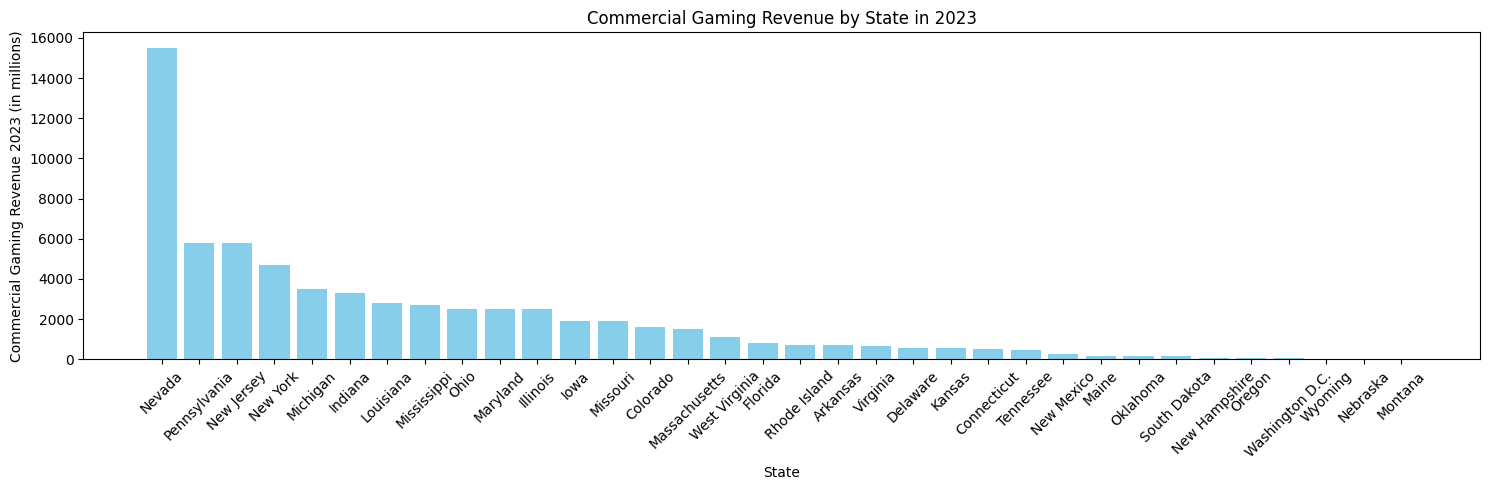

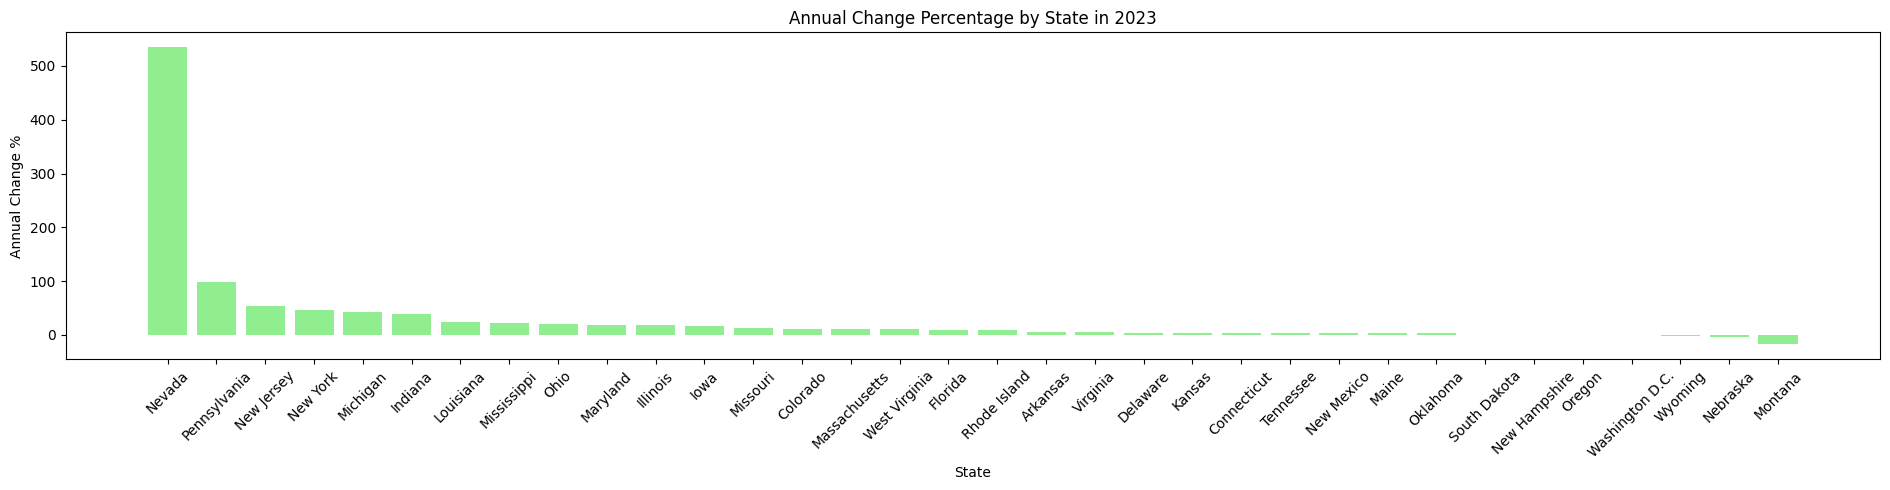

In [2]:
#Visualization
import matplotlib.pyplot as plt

# Plot Commercial Gaming Revenue
df_sorted_revenue = df.sort_values('Commercial Gaming Revenue 2023', ascending=False)
plt.figure(figsize=(15, 5))
plt.bar(df['State'], df_sorted_revenue['Commercial Gaming Revenue 2023'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Commercial Gaming Revenue 2023 (in millions)')
plt.title('Commercial Gaming Revenue by State in 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Annual Change %
df_sorted_change = df.sort_values('Annual Change %', ascending=False)
plt.figure(figsize=(19, 5))
plt.bar(df['State'], df_sorted_change['Annual Change %'], color='lightgreen')
plt.xlabel('State')
plt.ylabel('Annual Change %')
plt.title('Annual Change Percentage by State in 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

